In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Business Understanding

**Company Overview**  
Airbnb, Inc. operates an online community marketplace for people to list, discover, and book accommodations worldwide online. It also allows to book from a mobile phone to individuals and businesses. It allows its users to share their travel experiences. The company allows people to rent out their extra space and showcase it to audience. It also publishes an online travel magazine under the brand name Airbnbmag. Airbnb, Inc. was formerly known as AirBed & Breakfast, Inc. and changed its name to Airbnb, Inc. in March 2009. The company was founded in 2008 and is based in San Francisco, California, with offices across North America, Europe, and Asia. Source: Bloomberg.com  

How much or how many change the price? (regression)   
Which category produce more money? (classification)   
Which zones has more poirnts? (clustering)   
Which option should be taken a host to improve their value? (recommendation)   
Can you describe the vibe of each Boston neighborhood using listing descriptions?  
What are the busiest times of the year to visit Boston? By how much do prices spike?  
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?  




## Data Understading
**Data Source**  
https://www.kaggle.com/airbnb/seattle/kernels  
https://www.kaggle.com/airbnb/boston  

**Description**  
The following Airbnb activity is included in this Boston and Seattle dataset: * Listings, including full descriptions and average review score * Reviews, including unique id for each reviewer and detailed comments * Calendar, including listing id and the price and availability for that day  


**Enviroment**  Size, shape, type,head   


In [59]:

seattle_calendar = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/seattle/calendar.csv")
seattle_listing = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/seattle/listings.csv")
seattle_reviews = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/seattle/reviews.csv")
boston_calendar = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/boston-airbnb-open-data/calendar.csv")
boston_listing = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/boston-airbnb-open-data/listings.csv")
boston_reviews = pd.read_csv("https://raw.githubusercontent.com/Zhitaow/Airbnb-Data-Analysis/master/boston-airbnb-open-data/reviews.csv")

In [42]:
print("""Shapes
seattle_calendar {}
seattle_listing {}
seattle_reviews {}
boston_calendar {}
boston_listing {}
boston_reviews {}
""".format(seattle_calendar.shape, seattle_listing.shape, seattle_reviews.shape,
           boston_calendar.shape, boston_listing.shape, boston_reviews.shape))



Shapes
seattle_calendar (1393570, 4)
seattle_listing (3818, 92)
seattle_reviews (84849, 6)
boston_calendar (1308890, 4)
boston_listing (3585, 95)
boston_reviews (68275, 6)



In [79]:
print("Look for differents columns between Seattle and Boston")
print(set(seattle_calendar.columns).symmetric_difference(set(boston_calendar.columns))) 
print(set(seattle_reviews.columns).symmetric_difference(set(boston_reviews.columns)))
print(set(seattle_listing.columns).symmetric_difference(set(boston_listing.columns)))

Look for differents columns between Seattle and Boston
set()
set()
set()


In [49]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [50]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [51]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [52]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [64]:
print(seattle_listing.columns)
seattle_listing.head()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [66]:
print(boston_listing.columns)
boston_listing.head()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


## Data Preperation
Now, we go through the lengthy process of preparing our data. We go through the following phases:  

- Drop intesection 

- Identify Datasets

- Concat

- Handle Missing Values Columms  

- Keep features to analyze 

- Handle Missing Values Rows 

- Formatting 

- Categorical variables 


### Drop intersection

In [80]:

colums_todrop = list(set(seattle_listing.columns).symmetric_difference(set(boston_listing.columns)))
boston_listing.drop(labels = colums_todrop, axis = 1, inplace = True)


### Identify Datasets  


In [93]:
boston_reviews['city'], seattle_reviews['city'] = 'Boston', 'Seattle'
boston_calendar['city'],seattle_calendar['city'] = 'Boston', 'Seattle'
boston_listing['city'], seattle_list['city'] = 'Boston', 'Seattle'


### Concatenating Datasets  
I divided the analysis in three parts. 
1. Time series using calendars data  
2. Features analysis using listing
3. Reviews for sentiment Analysis

In [94]:
reviews = pd.concat([boston_reviews, seattle_reviews]).reset_index(drop = True)
calendar = pd.concat([boston_calendar,seattle_calendar]).reset_index(drop = True)
listing = pd.concat([boston_listing, seattle_list]).reset_index(drop = True)

### Handle Missing Values Columms

In [121]:
df = reviews
missings = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
pd.DataFrame({'Feature':missings.index, 'Total NaN':missings.values})

,Feature,Total NaN
0,comments,0.046368
1,city,0.000000
2,reviewer_name,0.000000
3,reviewer_id,0.000000
4,date,0.000000
5,id,0.000000
6,listing_id,0.000000


0                         license
1                     square_feet
2                   monthly_price
3                    weekly_price
4                security_deposit
5                has_availability
6    neighbourhood_group_cleansed
7              jurisdiction_names
8                           notes
Name: Feature, dtype: object

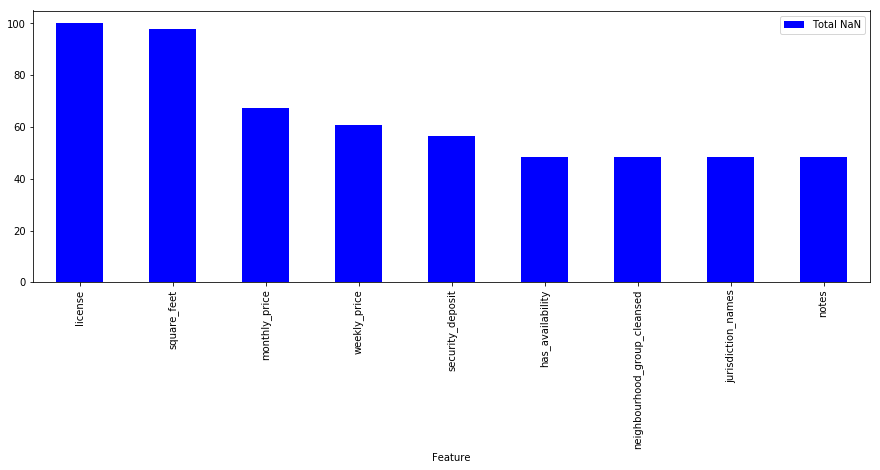

In [126]:

def missing_data(df, level = 5):
    
    try:
        missings = (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
        missings = pd.DataFrame({'Feature':missings.index, 'Total NaN':missings.values})
        missings[missings['Total NaN'] > level].plot.bar(x='Feature', y='Total NaN', figsize=(15, 5), color = 'blue')
        display(missings[missings['Total NaN'] > level]['Feature'])
    except:
        print("Not feature with more than {}% NaNs".format(level))
missing_data(listing, 40)


In [108]:
calendar_75 = set(calendar.columns[calendar.isnull().mean() > 0.75])
calendar_75

set()

In [109]:
listing_75 = set(listing.columns[listing.isnull().mean() > 0.50])
listing_75

{'license', 'monthly_price', 'security_deposit', 'square_feet', 'weekly_price'}

### Keep features to analyze


### Handle Missing Values Rows



### Formatting



### Categorical variables

## Modeling
We now have data that is cleaned and not missing values. But let's break our modeling to different phases:  

a) EDA  

b) Base Model  

c) Feature Selection  

d) Improved model  

## Deployment and Testing
We will deploy the model and test it on New York data. But if our assumption is that our model is general, we want to do the following:  

Use the most important features. This is to deploy a fast model.  

Remove host diff since it is asking for a variable found in listing which is a huge csv for New York for example`  

**Business Understanding:** This data contain a lot of parameters related to Boston and Seattle Airbnb data. Airbnb is in the business of offering host locations for cutomers. Like Amazon, those hosts rely on price and review score. I am assuming that review score correlates with profitability.

**Data Understanding:** The data is very dirty but contain a lot of informative insights. So we are required to do a lot of data preprocessing with the data.

**Data cleaning and preprocessing:** I spent a lot of time on cleaning the data and you can see from the code that the majority of my work is on data processing. At first, I started by removing columns that are not needed to trim the matrix, then I started remvoing missing data, then removing null data, and then creating dummy variables for categorical columns.

**Analysis:** I created a heatmap to show the correlation of data and removed data that are strongly correlated with each other.

**Model:** I used a base model which is linear regression which performed poorly. Then, I used decision tree regressor. The model score is 99%.

**Deploy:** To deploy this model quickly, we need to neglict calender list since it is huge and rely on the 9 features that we have except host diff. Our model still give 99% accuracy for Boston and Seattle but does not give good results for New York and San Franscisco indicating that each city need its own model and that we need to aggregate data.